## Análise de Teste ABC

Durante esse projeto iremos visualizar as informações de duas maneiras diferentes. A ideia é utilizar a biblioteca **pandas** e **pandasql**.
O Pandas é uma biblioteca própria usada para manipulação e análise de dados extremamente útil. A ideia de utilizar o Pandasql era uma recomendação do case técnico para realizar as consultas nos Dataframes usando a sintaxe do SQL.

#### Importação das bibliotecas usadas no projeto:

In [4]:
import pandas as pd
from pandasql import sqldf as ps
import unicodedata
import matplotlib.pyplot as plt

#### Criação dos dataframes iniciais ####

In [5]:
listaDeClientes = pd.read_csv('../dataset/clientes.csv')
listaDeProdutos = pd.read_csv('../dataset/produtos.csv')
listaDePedidos = pd.read_csv('../dataset/pedidos.csv')
listaDeItensPedidos = pd.read_csv('../dataset/itens_pedido.csv')

#### Pequena sessão apenas para testar o notebook e os dataframes

In [6]:
listaDeClientes.head(5)

,cliente_id,nome,email,data_cadastro,cidade,estado,grupo
0,12414,Pedro Lucas Almeida,pintogabriela@example.net,2022-09-17,Maranhao,SE,A
1,77301,João Miguel Jesus,stephany90@example.com,2021-11-17,Rio,AL,A
2,40685,Antônio Viana,lda-cunha@example.com,2021-11-18,Maranhão,RS,C
3,27481,Ana Luiza da Conceição,cardosomaria-julia@example.net,2024-06-11,Sao Paulo,DF,C
4,47354,Arthur Gomes,luiz-otaviocampos@example.com,2021-08-12,Goiania,MG,C


In [7]:
listaDeProdutos.head(5)

,produto_id,preco,categoria
0,3659,992.38,Eletrônicos
1,1568,170.59,Roupas
2,2382,336.87,Decoraçao
3,1016,951.66,Decoraçao
4,1550,587.50,Eletrônicos


In [8]:
listaDePedidos.head(5)

,pedido_id,cliente_id,data_pedido,status,valor_total
0,913239,27874,2024-01-05 12:56:17,Confirmado,6517
1,679493,77948,2023-11-15 18:41:09,Pending,3950
2,267663,23863,2024-04-08 14:04:47,Pending,3931
3,699688,79354,2024-06-25 17:10:28,Confirmado,1923
4,602702,36097,2023-08-21 17:46:05,Confirmado,125


In [9]:
listaDeItensPedidos.head(5)

,item_id,pedido_id,produto_id,quantidade,preco_unitario,subtotal
0,6640203,913239,9866,2,959.88,1919.76
1,9470774,913239,7759,3,434.90,1304.70
2,2385349,913239,5205,3,898.72,2696.16
3,2437996,913239,9432,1,304.54,304.54
4,2264260,913239,2572,1,292.27,292.27


In [10]:
print(listaDeClientes['cidade'].value_counts())

cidade
sao Paulo         266
Sao Paulo         165
Maranhao           92
Belo Horizonte     92
São Paulo          89
Rio                87
Curitiba           87
Rio de Janeiro     84
Goiania            83
Maranhão           78
Goiânia            77
Name: count, dtype: int64


Podemos verificar que dentro do arquivo há inconsistências em alguns dados. Normalmente isso ocorre por entradas manuais que podem acabar gerando distinções entre valores. Por isso, para padronizar os dados iremos criar uma função e um dicionário para usarmos no dataframe.

In [11]:


# ---------------------------
# Função para normalizar texto
# ---------------------------
def normalizar(texto):
    if pd.isnull(texto):
        return texto
    texto = texto.strip().lower()
    # Remove acentos
    texto = ''.join(
        c for c in unicodedata.normalize('NFD', texto)
        if unicodedata.category(c) != 'Mn'
    )
    return texto

# ---------------------------
# Carrega o dataset
# ---------------------------
df = pd.read_csv("../dataset/clientes.csv")

# ---------------------------
# Normalizar e padronizar a coluna 'cidade'
# ---------------------------
df["cidade_normalizada"] = df["cidade"].apply(normalizar)

mapeamento_cidades = {
    "sao paulo": "Sao Paulo",
    "rio de janeiro": "Rio de Janeiro",
    "rio": "Rio de Janeiro",
    "goiania": "Goiania",
    "maranhao": "Maranhao",
}

# Substitui a coluna original 'cidade' pelos nomes oficiais
df["cidade"] = df["cidade_normalizada"].map(mapeamento_cidades).fillna(df["cidade_normalizada"].str.title())

# ---------------------------
# Corrige a coluna 'estado' com base na cidade
# ---------------------------
cidade_para_estado = {
    "Sao Paulo": "SP",
    "Rio de Janeiro": "RJ",
    "Goiania": "GO",
    "Maranhao": "MA",
    "Belo Horizonte": "MG",
    "Curitiba": "PR",
}

# Atualiza a coluna 'estado' com o valor correto
df["estado"] = df["cidade"].map(cidade_para_estado)

# ---------------------------
# Remove coluna auxiliar
# ---------------------------
df = df.drop(columns=["cidade_normalizada"])

In [12]:
listaDeClientes2 = pd.read_csv('../dataset/cidades_corrigidas.csv')

In [13]:
print(listaDeClientes2['cidade'].value_counts())

cidade
Sao Paulo         520
Rio de Janeiro    171
Maranhao          170
Goiania           160
Belo Horizonte     92
Curitiba           87
Name: count, dtype: int64


A partir deste momento iremos utilizar *listaDeClientes2* para consultar os valores com as cidades padronizadas.

In [14]:
print(ps('''SELECT nome, cliente_id, cidade 
FROM listaDeClientes2
LIMIT 5'''))

                     nome  cliente_id          cidade
0     Pedro Lucas Almeida       12414        Maranhao
1       João Miguel Jesus       77301  Rio de Janeiro
2           Antônio Viana       40685        Maranhao
3  Ana Luiza da Conceição       27481       Sao Paulo
4            Arthur Gomes       47354         Goiania


## Hora de conhecermos mais informações sobre os dados!
### A ideia é saber quantos clientes existem em cada grupo.

In [15]:
listaDeClientes2['grupo'].value_counts()

grupo
A    413
B    398
C    389
Name: count, dtype: int64

In [16]:
listaDeClientes2[listaDeClientes2['grupo'] == 'B'].head()

,cliente_id,nome,email,data_cadastro,cidade,estado,grupo
10,35500,Kaique Rocha,fernandafreitas@example.com,2025-01-06,Maranhao,MA,B
14,96694,Pietro Alves,igorda-rosa@example.com,2021-10-25,Sao Paulo,SP,B
15,41781,Rodrigo Moraes,nogueiraleticia@example.org,2025-03-19,Curitiba,PR,B
16,16103,Vitor Gabriel da Paz,gustavo42@example.net,2023-12-04,Goiania,GO,B
18,58251,Rafaela Cardoso,nunesdiego@example.com,2022-03-07,Sao Paulo,SP,B


In [17]:
print(ps('''SELECT c.cliente_id, c.nome, c.grupo
FROM listaDeClientes2 AS c
WHERE grupo == 'B'
LIMIT 5'''))

   cliente_id                  nome grupo
0       35500          Kaique Rocha     B
1       96694          Pietro Alves     B
2       41781        Rodrigo Moraes     B
3       16103  Vitor Gabriel da Paz     B
4       58251       Rafaela Cardoso     B


In [18]:
listaDeClientes2[listaDeClientes2['grupo'] == 'B'].head()

,cliente_id,nome,email,data_cadastro,cidade,estado,grupo
10,35500,Kaique Rocha,fernandafreitas@example.com,2025-01-06,Maranhao,MA,B
14,96694,Pietro Alves,igorda-rosa@example.com,2021-10-25,Sao Paulo,SP,B
15,41781,Rodrigo Moraes,nogueiraleticia@example.org,2025-03-19,Curitiba,PR,B
16,16103,Vitor Gabriel da Paz,gustavo42@example.net,2023-12-04,Goiania,GO,B
18,58251,Rafaela Cardoso,nunesdiego@example.com,2022-03-07,Sao Paulo,SP,B


## Vamos seguir para a 1° resposta desejada:
- Qual grupo você escolheria para ser a nossa funcionalidade? Por quê?

Primeiro iremos realizar um merge entre as tabelas para obtermos as informações de valores dos pedidos e grupos dos clientes:

In [19]:
clientes_Pedidos = pd.merge(listaDePedidos, listaDeClientes2, on='cliente_id', how='inner')
print(clientes_Pedidos.columns)
clientes_Com_Informacoes_Do_Pedido = pd.merge(clientes_Pedidos, listaDeItensPedidos, on='pedido_id', how='inner')
print(clientes_Com_Informacoes_Do_Pedido.columns)

Index(['pedido_id', 'cliente_id', 'data_pedido', 'status', 'valor_total',
       'nome', 'email', 'data_cadastro', 'cidade', 'estado', 'grupo'],
      dtype='object')
Index(['pedido_id', 'cliente_id', 'data_pedido', 'status', 'valor_total',
       'nome', 'email', 'data_cadastro', 'cidade', 'estado', 'grupo',
       'item_id', 'produto_id', 'quantidade', 'preco_unitario', 'subtotal'],
      dtype='object')


Com o merge realizado, podemos retirar nossas métricas:

In [20]:
resumo_grupos = clientes_Com_Informacoes_Do_Pedido.groupby('grupo')['valor_total'].agg(
    soma_total='sum',
    media_total='mean'
).reset_index()

print(resumo_grupos)

  grupo  soma_total  media_total
0     A    36686994  3594.297443
1     B    43517468  3907.467720
2     C    37891358  3647.608587


In [21]:
clientes_Com_Informacoes_Do_Pedido['valor_total'] = pd.to_numeric(
    clientes_Com_Informacoes_Do_Pedido['valor_total'], errors='coerce'
)

metricas_grupo = clientes_Com_Informacoes_Do_Pedido.groupby('grupo').agg(
    qtd_pedidos=('pedido_id', 'nunique'),
    soma_vendas=('valor_total', 'sum'),
    ticket_medio=('valor_total', 'mean')
)

print(metricas_grupo.sort_values(by='soma_vendas', ascending=False))

       qtd_pedidos  soma_vendas  ticket_medio
grupo                                        
B             3267     43517468   3907.467720
C             3293     37891358   3647.608587
A             3440     36686994   3594.297443


Levando em consideração o desempenho mostrado  - soma total de vendas e o valor do ticket médio de cada grupo - , podemos notar que o grupo B tem resultados financeiros melhores do que nos demais grupos. Portanto, a minha escolha seria selecionar a funcionalidade adicionada ao Grupo B. 

## Iniciando a 2° pergunta:
- De acordo com suas análises, o estado do usuário influencia no valor das
vendas?

### Para descobrimos essa informação, iremos verificar: _Quantidade de pedidos_, _soma de vendas_ e o _valor médio de vendas por estado_:

In [22]:
metricas_estado = clientes_Com_Informacoes_Do_Pedido.groupby('estado').agg(
    qtd_pedidos=('pedido_id', 'nunique'),
    soma_vendas=('valor_total', 'sum'),
    ticket_medio=('valor_total', 'mean')
).sort_values(by='soma_vendas', ascending=False)

print(metricas_estado.head())

        qtd_pedidos  soma_vendas  ticket_medio
estado                                        
SP             4331     51549746   3736.842769
RJ             1425     16418701   3678.848532
MA             1372     16318003   3751.265057
GO             1370     16042441   3693.861616
PR              782      9041101   3648.547619


In [23]:
query = """
SELECT 
    estado,
    COUNT(DISTINCT pedido_id) AS qtd_pedidos,
    SUM(valor_total) AS soma_vendas,
    AVG(valor_total) AS ticket_medio
FROM clientes_Com_Informacoes_Do_Pedido
GROUP BY estado
ORDER BY soma_vendas DESC
"""

metricas_estado_sql = ps(query, locals())


print(metricas_estado_sql.head())

  estado  qtd_pedidos  soma_vendas  ticket_medio
0     SP         4331     51549746   3736.842769
1     RJ         1425     16418701   3678.848532
2     MA         1372     16318003   3751.265057
3     GO         1370     16042441   3693.861616
4     PR          782      9041101   3648.547619


A seguir uma forma mais simplificada para verificarmos apenas o valor total de vendas:

In [24]:
top_estados = clientes_Com_Informacoes_Do_Pedido.groupby('estado')['valor_total'] \
    .sum().reset_index().sort_values(by='valor_total', ascending=False)
print(top_estados.head())

  estado  valor_total
5     SP     51549746
4     RJ     16418701
1     MA     16318003
0     GO     16042441
3     PR      9041101


In [25]:
query_estados = """
SELECT
    estado,
    SUM(valor_total) AS valor_total
FROM clientes_Com_Informacoes_Do_Pedido
GROUP BY estado
ORDER BY valor_total DESC
LIMIT 5
"""

top_estados_sql = ps(query_estados, locals())
print("Top estados por valor total de vendas:")
print(top_estados_sql)

Top estados por valor total de vendas:
  estado  valor_total
0     SP     51549746
1     RJ     16418701
2     MA     16318003
3     GO     16042441
4     PR      9041101


### Criação de uma tabela para verificar grupo x estado:

In [26]:

tabela_cruzada = clientes_Com_Informacoes_Do_Pedido.pivot_table(
    index='estado',
    columns='grupo',
    values='cliente_id',
    aggfunc='nunique',
    fill_value=0
)

print(tabela_cruzada)

grupo     A    B    C
estado               
GO       51   55   54
MA       67   54   49
MG       38   30   24
PR       34   27   26
RJ       59   58   54
SP      164  174  182


O estado de São Paulo lidera em valor de vendas com R$35.131045 a frente do 2° estado(Rio de Janeiro), tendo 3x mais quantidade de pedidos e 3x mais clientes.

In [27]:
top_cidades = clientes_Com_Informacoes_Do_Pedido.groupby('cidade')['valor_total'] \
    .sum().reset_index().sort_values(by='valor_total', ascending=False)
print(top_cidades)

           cidade  valor_total
5       Sao Paulo     51549746
4  Rio de Janeiro     16418701
3        Maranhao     16318003
2         Goiania     16042441
1        Curitiba      9041101
0  Belo Horizonte      8725828


In [28]:
query_cidades = """
SELECT
    cidade,
    SUM(valor_total) AS valor_total
FROM clientes_Com_Informacoes_Do_Pedido
GROUP BY cidade
ORDER BY valor_total DESC
"""

top_cidades_sql = ps(query_cidades, locals())
print("\nTop cidades por valor total de vendas:")
print(top_cidades_sql)


Top cidades por valor total de vendas:
           cidade  valor_total
0       Sao Paulo     51549746
1  Rio de Janeiro     16418701
2        Maranhao     16318003
3         Goiania     16042441
4        Curitiba      9041101
5  Belo Horizonte      8725828


### Gráfico de barras representando a diferença do valor total de vendas entre as cidades:

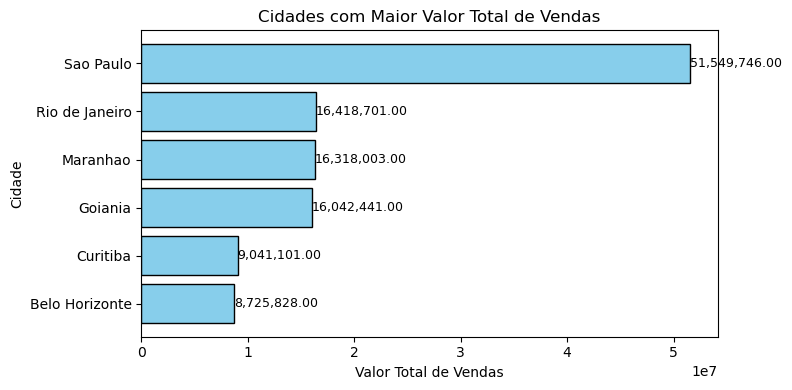

In [29]:
plt.figure(figsize=(8,4))
plt.barh(
    top_cidades['cidade'], 
    top_cidades['valor_total'], 
    color='skyblue', edgecolor='black'
)

plt.title('Cidades com Maior Valor Total de Vendas')
plt.xlabel('Valor Total de Vendas')
plt.ylabel('Cidade')

plt.gca().invert_yaxis()

for i, v in enumerate(top_cidades['valor_total']):
    plt.text(v, i, f'{v:,.2f}', va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()

## Pergunta 4:
- A categoria do produto ou quantidade de itens do pedido influencia no status
no pedido?

Para identificarmos as informações irei realizar um merge entre as tabelas para obtermos os dados:

In [30]:
dados_com_categoria = pd.merge(
    clientes_Com_Informacoes_Do_Pedido,
    listaDeProdutos[['produto_id', 'categoria']],
    on='produto_id',
    how='left'
)

categoria_status = dados_com_categoria.groupby(['categoria', 'status']) \
    .agg(qtd_pedidos=('pedido_id', 'nunique')).reset_index()

print(categoria_status.sort_values(by='qtd_pedidos', ascending=False))

      categoria      status  qtd_pedidos
25       Roupas  Confirmado         4195
16  Eletrônicos  Confirmado         2785
22       Livros  Confirmado         2521
19     Esportes  Confirmado         1609
4    Brinquedos  Confirmado         1390
7     Decoraçao  Confirmado         1282
13  Eletronicos  Confirmado         1155
10    Decoração  Confirmado         1129
24       Roupas   CANCELADO         1091
26       Roupas     Pending         1086
1     Alimentos  Confirmado          993
17  Eletrônicos     Pending          690
15  Eletrônicos   CANCELADO          682
21       Livros   CANCELADO          629
23       Livros     Pending          620
20     Esportes     Pending          419
18     Esportes   CANCELADO          391
6     Decoraçao   CANCELADO          343
5    Brinquedos     Pending          337
8     Decoraçao     Pending          329
3    Brinquedos   CANCELADO          312
14  Eletronicos     Pending          298
12  Eletronicos   CANCELADO          295
11    Decoração 

Podemos verificar que os dados também não estão padronizados como ocorreu lá no início. Iremos novamente utilizar a função _normalizar_ criada anteriormente para mantermos um único tipo de dado sem distinções entre palavras com acento e sem acento.

In [31]:
# Normaliza a coluna 'categoria'
dados_com_categoria['categoria_normalizada'] = dados_com_categoria['categoria'].apply(normalizar)

# Dicionário para manter forma oficial (sem acento, padronizada)
mapeamento_categoria = {
    "eletronicos": "Eletronicos",
    "moveis": "Moveis",
    "informatica": "Informatica",
    "eletrodomesticos": "Eletrodomesticos",
    "decoraçao" : "Decoracao",
    # Adicione outras categorias conforme necessário
}

# Substitui pela forma oficial
dados_com_categoria['categoria'] = dados_com_categoria['categoria_normalizada'].map(
    mapeamento_categoria
).fillna(dados_com_categoria['categoria_normalizada'].str.title())

# Remove coluna auxiliar
dados_com_categoria = dados_com_categoria.drop(columns=['categoria_normalizada'])

# Agrupamento agora padronizado e sem duplicidade de informações
categoria_status = dados_com_categoria.groupby(['categoria', 'status']) \
    .agg(qtd_pedidos=('pedido_id', 'nunique')).reset_index()

print(categoria_status.sort_values(by='qtd_pedidos', ascending=False))

      categoria      status  qtd_pedidos
19       Roupas  Confirmado         4195
10  Eletronicos  Confirmado         3493
16       Livros  Confirmado         2521
7     Decoracao  Confirmado         2222
13     Esportes  Confirmado         1609
4    Brinquedos  Confirmado         1390
18       Roupas   CANCELADO         1091
20       Roupas     Pending         1086
1     Alimentos  Confirmado          993
11  Eletronicos     Pending          887
9   Eletronicos   CANCELADO          870
15       Livros   CANCELADO          629
17       Livros     Pending          620
8     Decoracao     Pending          572
6     Decoracao   CANCELADO          561
14     Esportes     Pending          419
12     Esportes   CANCELADO          391
5    Brinquedos     Pending          337
3    Brinquedos   CANCELADO          312
0     Alimentos   CANCELADO          238
2     Alimentos     Pending          228


### Criação de uma tabela com as categorias com pedidos cancelados por estado:

In [32]:
# Filtra apenas pedidos CANCELADOS (todas as categorias)
cancelados = dados_com_categoria[dados_com_categoria['status'] == 'CANCELADO']

# Cria a pivot table: estados x categorias
tabela_cancelados = cancelados.pivot_table(
    index='estado',
    columns='categoria',
    values='pedido_id',
    aggfunc='nunique',  
    fill_value=0
)

print(tabela_cancelados)

categoria  Alimentos  Brinquedos  Decoracao  Eletronicos  Esportes  Livros  \
estado                                                                       
GO                25          41         70          113        62      86   
MA                24          42         81          122        43      83   
MG                18          28         39           61        39      41   
PR                30          22         38           74        33      53   
RJ                40          42         85          134        56     101   
SP               101         137        248          366       158     265   

categoria  Roupas  
estado             
GO            139  
MA            137  
MG             97  
PR             74  
RJ            153  
SP            491  


Com os dados já padronizados podemos assumir que sim, as categorias com uma quantidade de pedidos relativamente menor(Ex: Brinquedos, Alimentos e Esportes) tem menos chances de serem canceladas em comparações as categorias mais pedidas como Roupas e Eletronicos.

## Métricas adicionais:
- Visualização dos 5 estados com mais pedidos em status de "Confirmado" para a categoria mais vendida(Roupas)

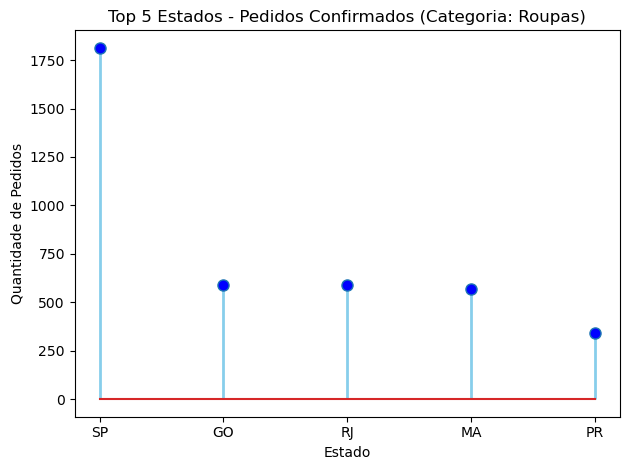

In [33]:
# Filtra apenas categoria = Roupas e status = Confirmado
roupas_confirmados = dados_com_categoria[
    (dados_com_categoria['categoria'] == 'Roupas') &
    (dados_com_categoria['status'] == 'Confirmado')
]

# Agrupa por estado e conta pedidos
pedidos_por_estado = roupas_confirmados.groupby('estado') \
    .agg(qtd_pedidos=('pedido_id', 'nunique')) \
    .reset_index()

top5_estados = pedidos_por_estado.sort_values(
    by='qtd_pedidos', ascending=False
).head(5)

markerline, stemlines, baseline = plt.stem(
    top5_estados['estado'], 
    top5_estados['qtd_pedidos'],

)

# Customização
plt.setp(markerline, markersize=8, markerfacecolor='blue')
plt.setp(stemlines, linewidth=2, color='skyblue')

plt.title('Top 5 Estados - Pedidos Confirmados (Categoria: Roupas)')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Pedidos')
plt.tight_layout()
plt.show()

De acordo com os resultados, podemos verificar que o estado de São Paulo foi o que mais vendeu na categoria roupa, tendo um total de 1750 pedidos confirmados até o momento.

## Análise final:
Portanto , ao final dessa análise podemos concluir que a base de clientes é majoritariamente do estado de SP, que sua categoria favorita de compras são roupas e que os clientes do grupo B tiveram um desempenho melhor para a margem de lucro da empresa.